## About Dataset

##### Context

Since 2008, guests and hosts have used Airbnb to expand on traveling possibilities and present more unique, personalized way of experiencing the world. This dataset describes the listing activity and metrics in NYC, NY for 2019.

##### Content

This data file includes all needed information to find out more about hosts, geographical availability, necessary metrics to make predictions and draw conclusions.

##### Acknowledgements

This public dataset is part of Airbnb, and the original source can be found on this website.

##### Inspiration

What can we learn about different hosts and areas?
What can we learn from predictions? (ex: locations, prices, reviews, etc)
Which hosts are the busiest and why?
Is there any noticeable difference of traffic among different areas and what could be the reason for it?

<img src="NewYorkCity.png" alt="Global AI Hub">

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
df=pd.read_csv("data.csv")

## EDA

In [3]:
df.head()

id                                              name  host_id  \
0  2539                Clean & quiet apt home by the park     2787   
1  2595                             Skylit Midtown Castle     2845   
2  3647               THE VILLAGE OF HARLEM....NEW YORK !     4632   
3  3831                   Cozy Entire Floor of Brownstone     4869   
4  5022  Entire Apt: Spacious Studio/Loft by central park     7192   

     host_name neighbourhood_group neighbourhood  latitude  longitude  \
0         John            Brooklyn    Kensington  40.64749  -73.97237   
1     Jennifer           Manhattan       Midtown  40.75362  -73.98377   
2    Elisabeth           Manhattan        Harlem  40.80902  -73.94190   
3  LisaRoxanne            Brooklyn  Clinton Hill  40.68514  -73.95976   
4        Laura           Manhattan   East Harlem  40.79851  -73.94399   

         room_type  price  minimum_nights  number_of_reviews last_review  \
0     Private room    149               1                  9  2018-10-19   
1  Entire home/apt    225               1                 45  2019-05-21   
2     Private room    150               3                  0         NaN   
3  Entire home/apt     89               1                270  2019-07-05   
4  Entire home/apt     80              10                  9  2018-11-19   

   reviews_per_month  calculated_host_listings_count  availability_365  
0               0.21                               6               365  
1               0.38                               2               355  
2                NaN                               1               365  
3               4.64                               1               194  
4               0.10                               1                 0

In [4]:
df.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

In [5]:
df.drop(['id','host_id','host_name'], axis=1,inplace=True)

In [6]:
df.shape

(48895, 13)

In [7]:
df.sample(20)

name neighbourhood_group  \
20824          Extra Cozy Room in Center of Williamsburg            Brooklyn   
14785                   *CoZy Private Williamsburg Home*            Brooklyn   
5056                              Spacious 2BR townhouse            Brooklyn   
41178                      Charming lower east side room           Manhattan   
17929                 Spacious studio close to Manhatten              Queens   
35826  Newly renovated private room w/ view! 5mins to...            Brooklyn   
32833                     Studio - 5Mins to Times Square           Manhattan   
39293              ‘Age of Innocence’ | Studio Apartment            Brooklyn   
26397                          Newly Renovated Apartment            Brooklyn   
26382           BEST LOCATION, ROOFTOP, ROOMY AND BRIGHT           Manhattan   
17924                  Park Slope Railroad Room in July!            Brooklyn   
35475                        Big and bright private room           Manhattan   
37746                             BRONX SUNNY CLEAN ROOM               Bronx   
47612               Stunning Duplex in prime Park Slope!            Brooklyn   
7368                             A Historic Harlem Abode           Manhattan   
38903    Beautiful large room Manhattan/Roosevelt Island           Manhattan   
48403  Gorgeous 5th FL Walk-up Historic Harlem Sugar ...           Manhattan   
47150            Shared Apartment in a cool neighborhood           Manhattan   
45124              Cozy Two-Bedroom - Close To Manhattan            Brooklyn   
34042   Private room with amazing Manhattan view rooftop            Brooklyn   

            neighbourhood  latitude  longitude        room_type  price  \
20824        Williamsburg  40.71404  -73.95783     Private room     98   
14785        Williamsburg  40.70998  -73.94854  Entire home/apt    225   
5056             Bushwick  40.68779  -73.90521  Entire home/apt    170   
41178     Lower East Side  40.72026  -73.98787     Private room     80   
17929           Sunnyside  40.73894  -73.92343  Entire home/apt     85   
35826         Sunset Park  40.64689  -74.01401     Private room     55   
32833             Midtown  40.76666  -73.98156  Entire home/apt    200   
39293          Park Slope  40.67193  -73.97334  Entire home/apt    100   
26397  Bedford-Stuyvesant  40.68171  -73.94471  Entire home/apt    180   
26382  Financial District  40.70445  -74.01521  Entire home/apt    135   
17924          Park Slope  40.67026  -73.97668     Private room     40   
35475         East Harlem  40.79610  -73.94366     Private room    100   
37746         Parkchester  40.83872  -73.87149      Shared room     45   
47612          Park Slope  40.67853  -73.97749  Entire home/apt    250   
7368          East Harlem  40.79963  -73.94628  Entire home/apt    103   
38903    Roosevelt Island  40.76160  -73.95052     Private room     55   
48403              Harlem  40.82913  -73.94484  Entire home/apt    199   
47150         East Harlem  40.78850  -73.95093     Private room     80   
45124  Bedford-Stuyvesant  40.68558  -73.93746  Entire home/apt    140   
34042             Gowanus  40.68293  -73.98979     Private room     95   

       minimum_nights  number_of_reviews last_review  reviews_per_month  \
20824               1                  3  2017-01-01               0.10   
14785               2                110  2019-07-07               2.74   
5056                2                 41  2016-01-25               0.69   
41178              20                  2  2019-04-19               0.48   
17929               1                  4  2016-09-13               0.11   
35826               1                 31  2019-06-28               3.10   
32833              30                  0         NaN                NaN   
39293               3                 26  2019-06-24               3.79   
26397               2                 13  2019-06-30               0.73   
26382               6                 10  2019-06-17              

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 13 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   name                            48879 non-null  object 
 1   neighbourhood_group             48895 non-null  object 
 2   neighbourhood                   48895 non-null  object 
 3   latitude                        48895 non-null  float64
 4   longitude                       48895 non-null  float64
 5   room_type                       48895 non-null  object 
 6   price                           48895 non-null  int64  
 7   minimum_nights                  48895 non-null  int64  
 8   number_of_reviews               48895 non-null  int64  
 9   last_review                     38843 non-null  object 
 10  reviews_per_month               38843 non-null  float64
 11  calculated_host_listings_count  48895 non-null  int64  
 12  availability_365                

In [9]:
df.isnull().sum()

name                                 16
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [10]:
df.name.value_counts()

Hillside Hotel                                        18
Home away from home                                   17
New york Multi-unit building                          16
Brooklyn Apartment                                    12
Loft Suite @ The Box House Hotel                      11
                                                      ..
Large 1BR Apt. in Williamsburg                         1
Feel at Home                                           1
Spacious Modern Alcove Studio in a Luxury Building     1
Artist's Room in Large Apartment                       1
Trendy duplex in the very heart of Hell's Kitchen      1
Name: name, Length: 47905, dtype: int64

In [11]:
df.describe()

latitude     longitude         price  minimum_nights  \
count  48895.000000  48895.000000  48895.000000    48895.000000   
mean      40.728949    -73.952170    152.720687        7.029962   
std        0.054530      0.046157    240.154170       20.510550   
min       40.499790    -74.244420      0.000000        1.000000   
25%       40.690100    -73.983070     69.000000        1.000000   
50%       40.723070    -73.955680    106.000000        3.000000   
75%       40.763115    -73.936275    175.000000        5.000000   
max       40.913060    -73.712990  10000.000000     1250.000000   

       number_of_reviews  reviews_per_month  calculated_host_listings_count  \
count       48895.000000       38843.000000                    48895.000000   
mean           23.274466           1.373221                        7.143982   
std            44.550582           1.680442                       32.952519   
min             0.000000           0.010000                        1.000000   
25%             1.000000           0.190000                        1.000000   
50%             5.000000           0.720000                        1.000000   
75%            24.000000           2.020000                        2.000000   
max           629.000000          58.500000                      327.000000   

       availability_365  
count      48895.000000  
mean         112.781327  
std          131.622289  
min            0.000000  
25%            0.000000  
50%           45.000000  
75%          227.000000  
max          365.000000

In [12]:
df.fillna({"reviews_per_month":0, "name":0, "last_review":0}, inplace=True)
df.isnull().sum()

name                              0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
last_review                       0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

## DATA VISUALIZATION

In [13]:
sns.set_theme(style="darkgrid")

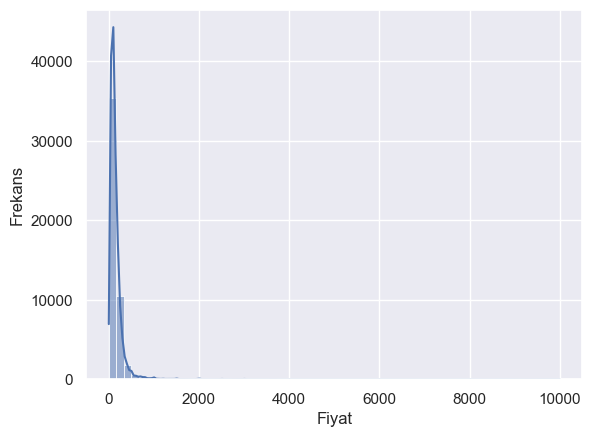

In [14]:
sns.histplot(df["price"],kde=True, bins=60, )
plt.xlabel("Fiyat")
plt.ylabel("Frekans")
plt.show()

Text(0.5, 1.0, 'Oda Tiplerinin Frekansı')

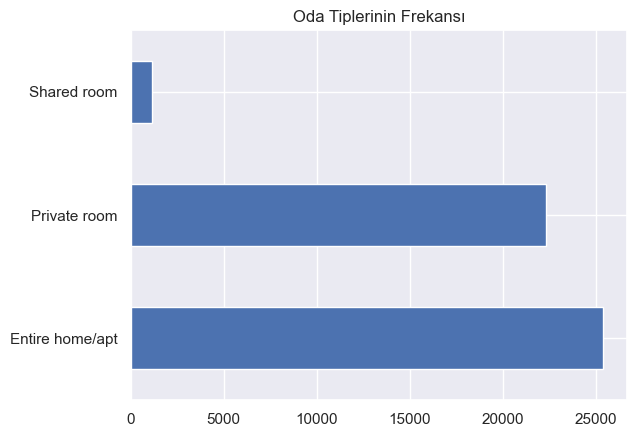

In [15]:
df['room_type'].value_counts().plot.barh().set_title("Oda Tiplerinin Frekansı")

Text(0.5, 1.0, 'Mahalle Gruplarının Frekansı')

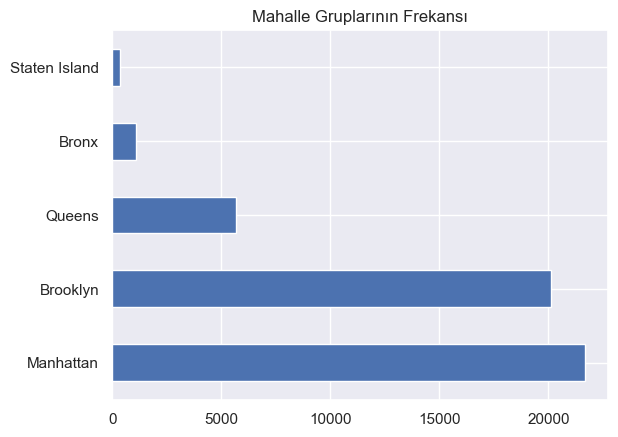

In [16]:
df['neighbourhood_group'].value_counts().plot.barh().set_title("Mahalle Gruplarının Frekansı")

<AxesSubplot:>

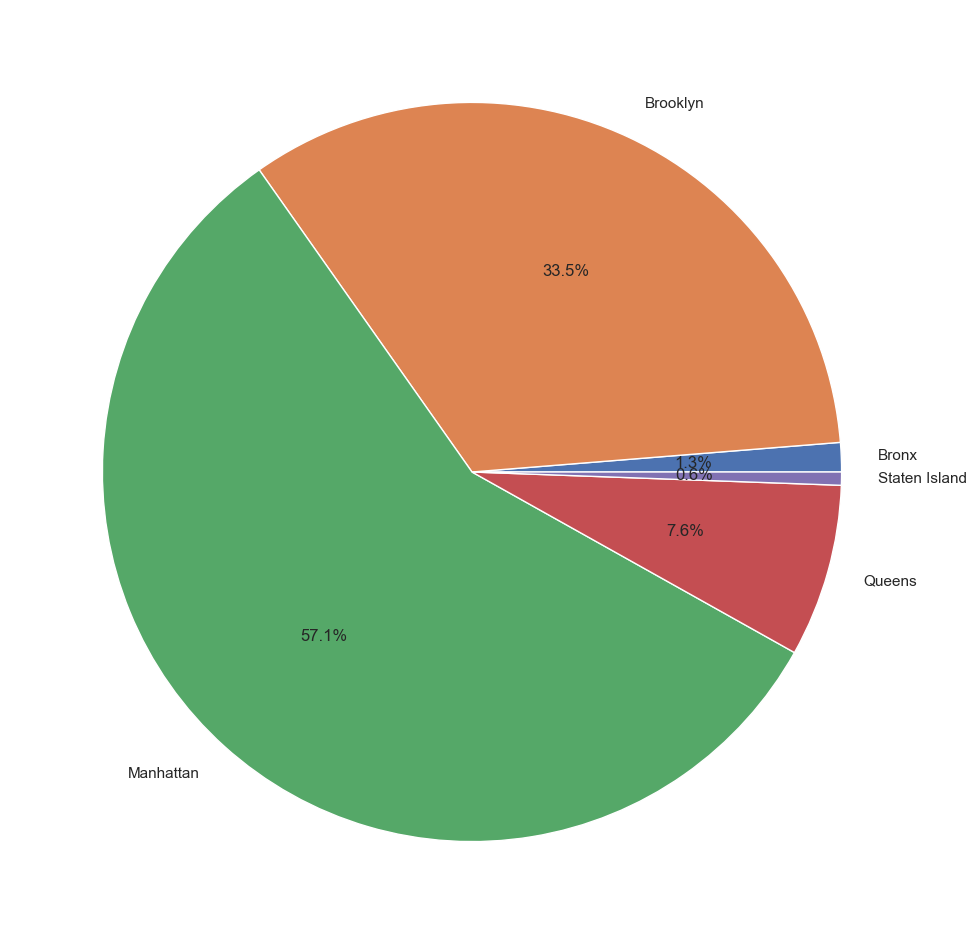

In [17]:
df.groupby("neighbourhood_group").sum().plot.pie(y="price", autopct="%.1f%%", ylabel="", legend=False, figsize=(12,12))

Text(0.5, 1.0, 'Mahalleye Göre Fiyat Ortalaması')

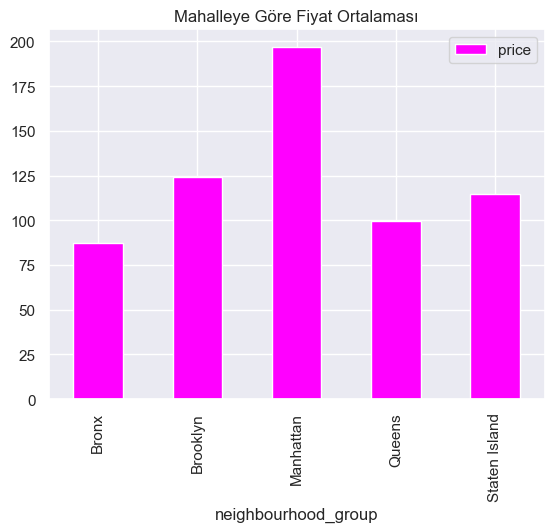

In [18]:
df.groupby('neighbourhood_group').agg({'price':'mean'}).plot.bar(alpha=1,color='magenta').set_title("Mahalleye Göre Fiyat Ortalaması")

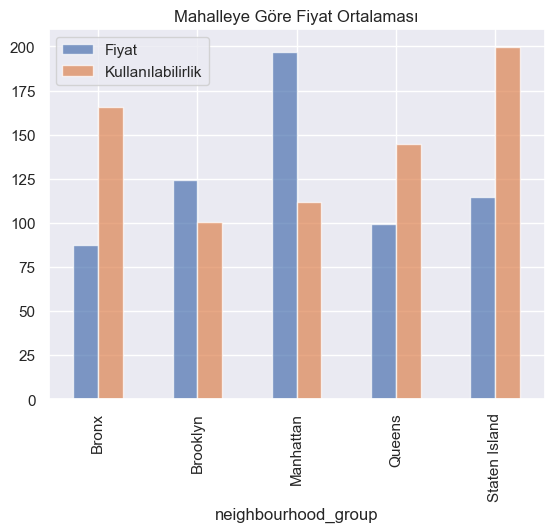

In [19]:
df.groupby('neighbourhood_group').agg({'price':'mean','availability_365':'mean'}).plot.bar(alpha=0.7).set_title("Mahalleye Göre Fiyat Ortalaması")
plt.legend(['Fiyat','Kullanılabilirlik'])

In [20]:
df_1 = df.groupby(by=['neighbourhood_group', 'room_type']).agg({'price':'mean'})
df_1.reset_index(inplace=True)
print(df_1)

   neighbourhood_group        room_type       price
0                Bronx  Entire home/apt  127.506596
1                Bronx     Private room   66.788344
2                Bronx      Shared room   59.800000
3             Brooklyn  Entire home/apt  178.327545
4             Brooklyn     Private room   76.500099
5             Brooklyn      Shared room   50.527845
6            Manhattan  Entire home/apt  249.239109
7            Manhattan     Private room  116.776622
8            Manhattan      Shared room   88.977083
9               Queens  Entire home/apt  147.050573
10              Queens     Private room   71.762456
11              Queens      Shared room   69.020202
12       Staten Island  Entire home/apt  173.846591
13       Staten Island     Private room   62.292553
14       Staten Island      Shared room   57.444444


Text(0.5, 1.0, 'Mahalle - Fiyat - Oda Tipi')

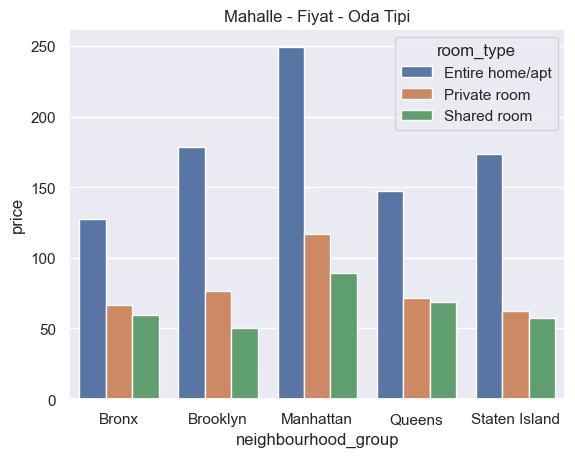

In [21]:
sns.barplot(x=df_1['neighbourhood_group'],y=df_1['price'],hue=df_1['room_type'])
plt.title("Mahalle - Fiyat - Oda Tipi")

Text(0.5, 1.0, 'Mahalle - Fiyat')

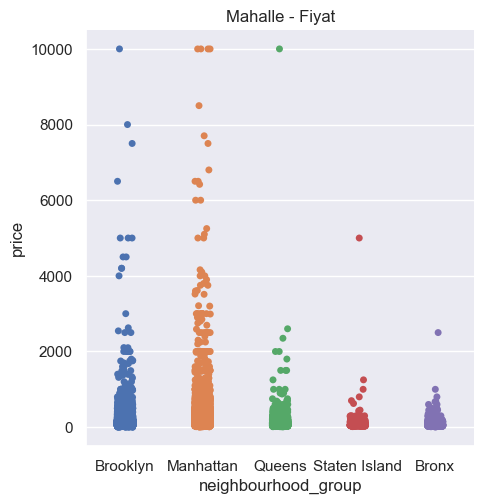

In [22]:
sns.catplot(x="neighbourhood_group", y="price", data=df)
plt.title("Mahalle - Fiyat")

Text(0.5, 1.0, 'Mahalle ve Oda Tipine Göre Fiyat Ortalaması')

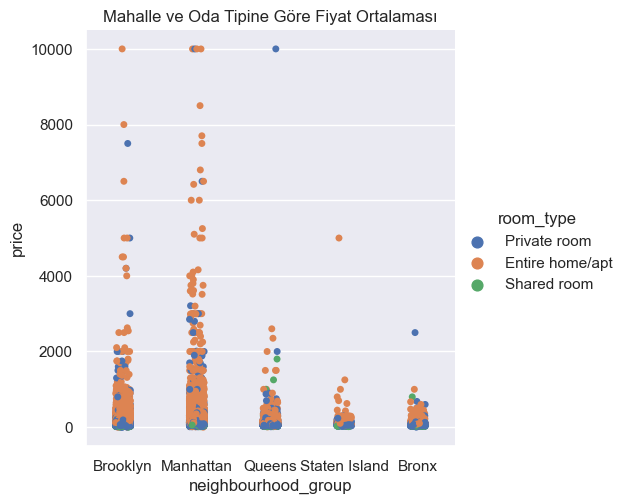

In [23]:
sns.catplot(data=df, x="neighbourhood_group", y="price", kind= 'strip' ,hue="room_type")
plt.title("Mahalle ve Oda Tipine Göre Fiyat Ortalaması")

Text(0.5, 1.0, 'Mahalle ve Oda Tipine Göre Fiyat Ortalaması')

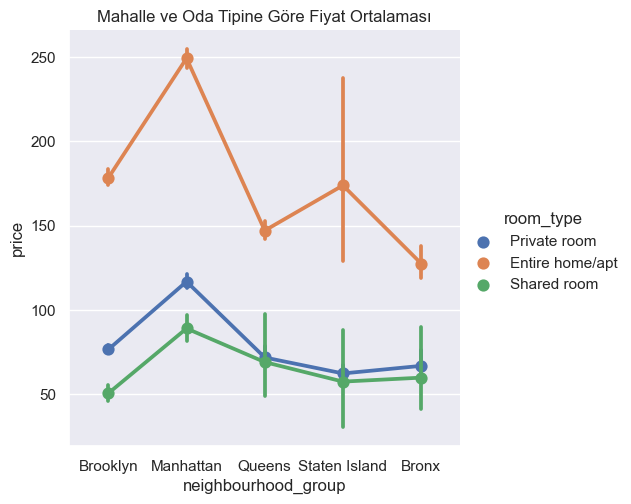

In [24]:
sns.catplot(x="neighbourhood_group", y="price", hue="room_type", kind="point",data=df)
plt.title("Mahalle ve Oda Tipine Göre Fiyat Ortalaması")

In [25]:
df['availability_365'].value_counts()

0      17533
365     1295
364      491
1        408
89       361
       ...  
195       26
183       24
196       24
181       23
202       20
Name: availability_365, Length: 366, dtype: int64

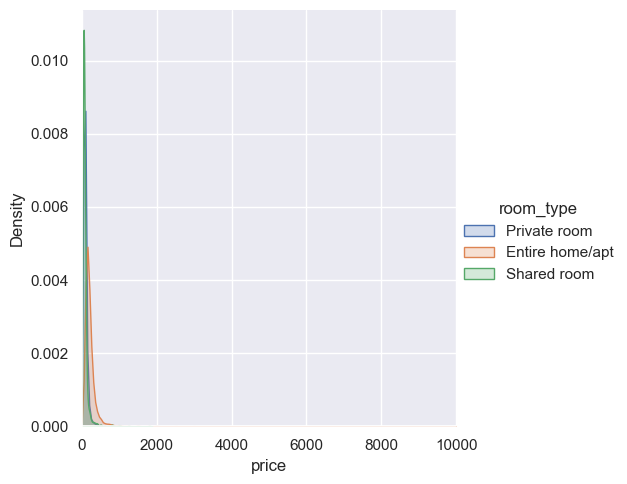

In [26]:
sns.FacetGrid(df, hue="room_type", height=5, xlim=(0, df['price'].max())).map(sns.kdeplot, "price", shade=True).add_legend()

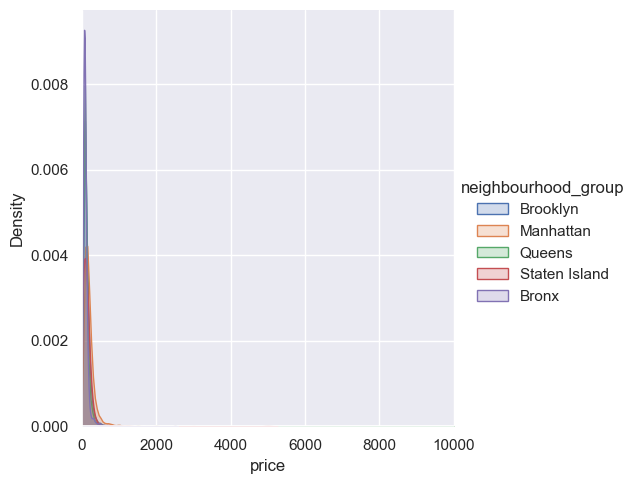

In [27]:
sns.FacetGrid(df, hue="neighbourhood_group", height=5, xlim=(0, 10000)).map(sns.kdeplot, "price", shade=True).add_legend()

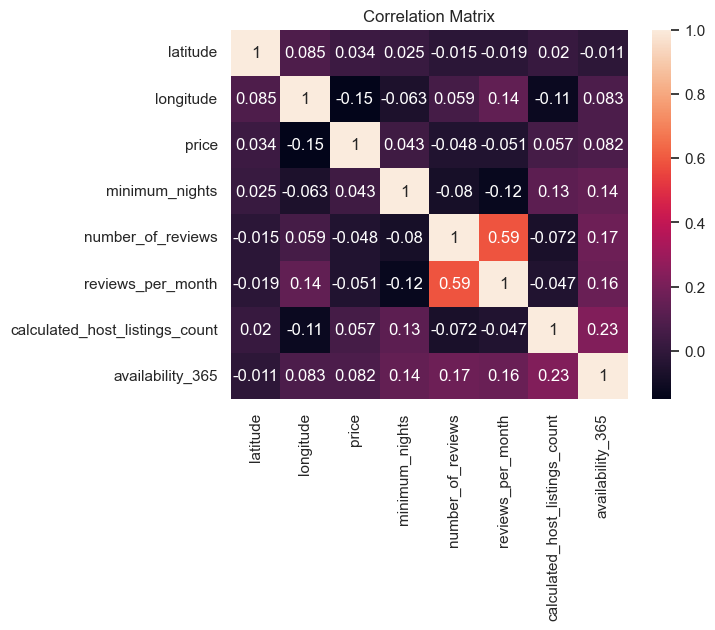

In [28]:
plt.title("Correlation Matrix")
sns.heatmap(df.corr(), annot=True);

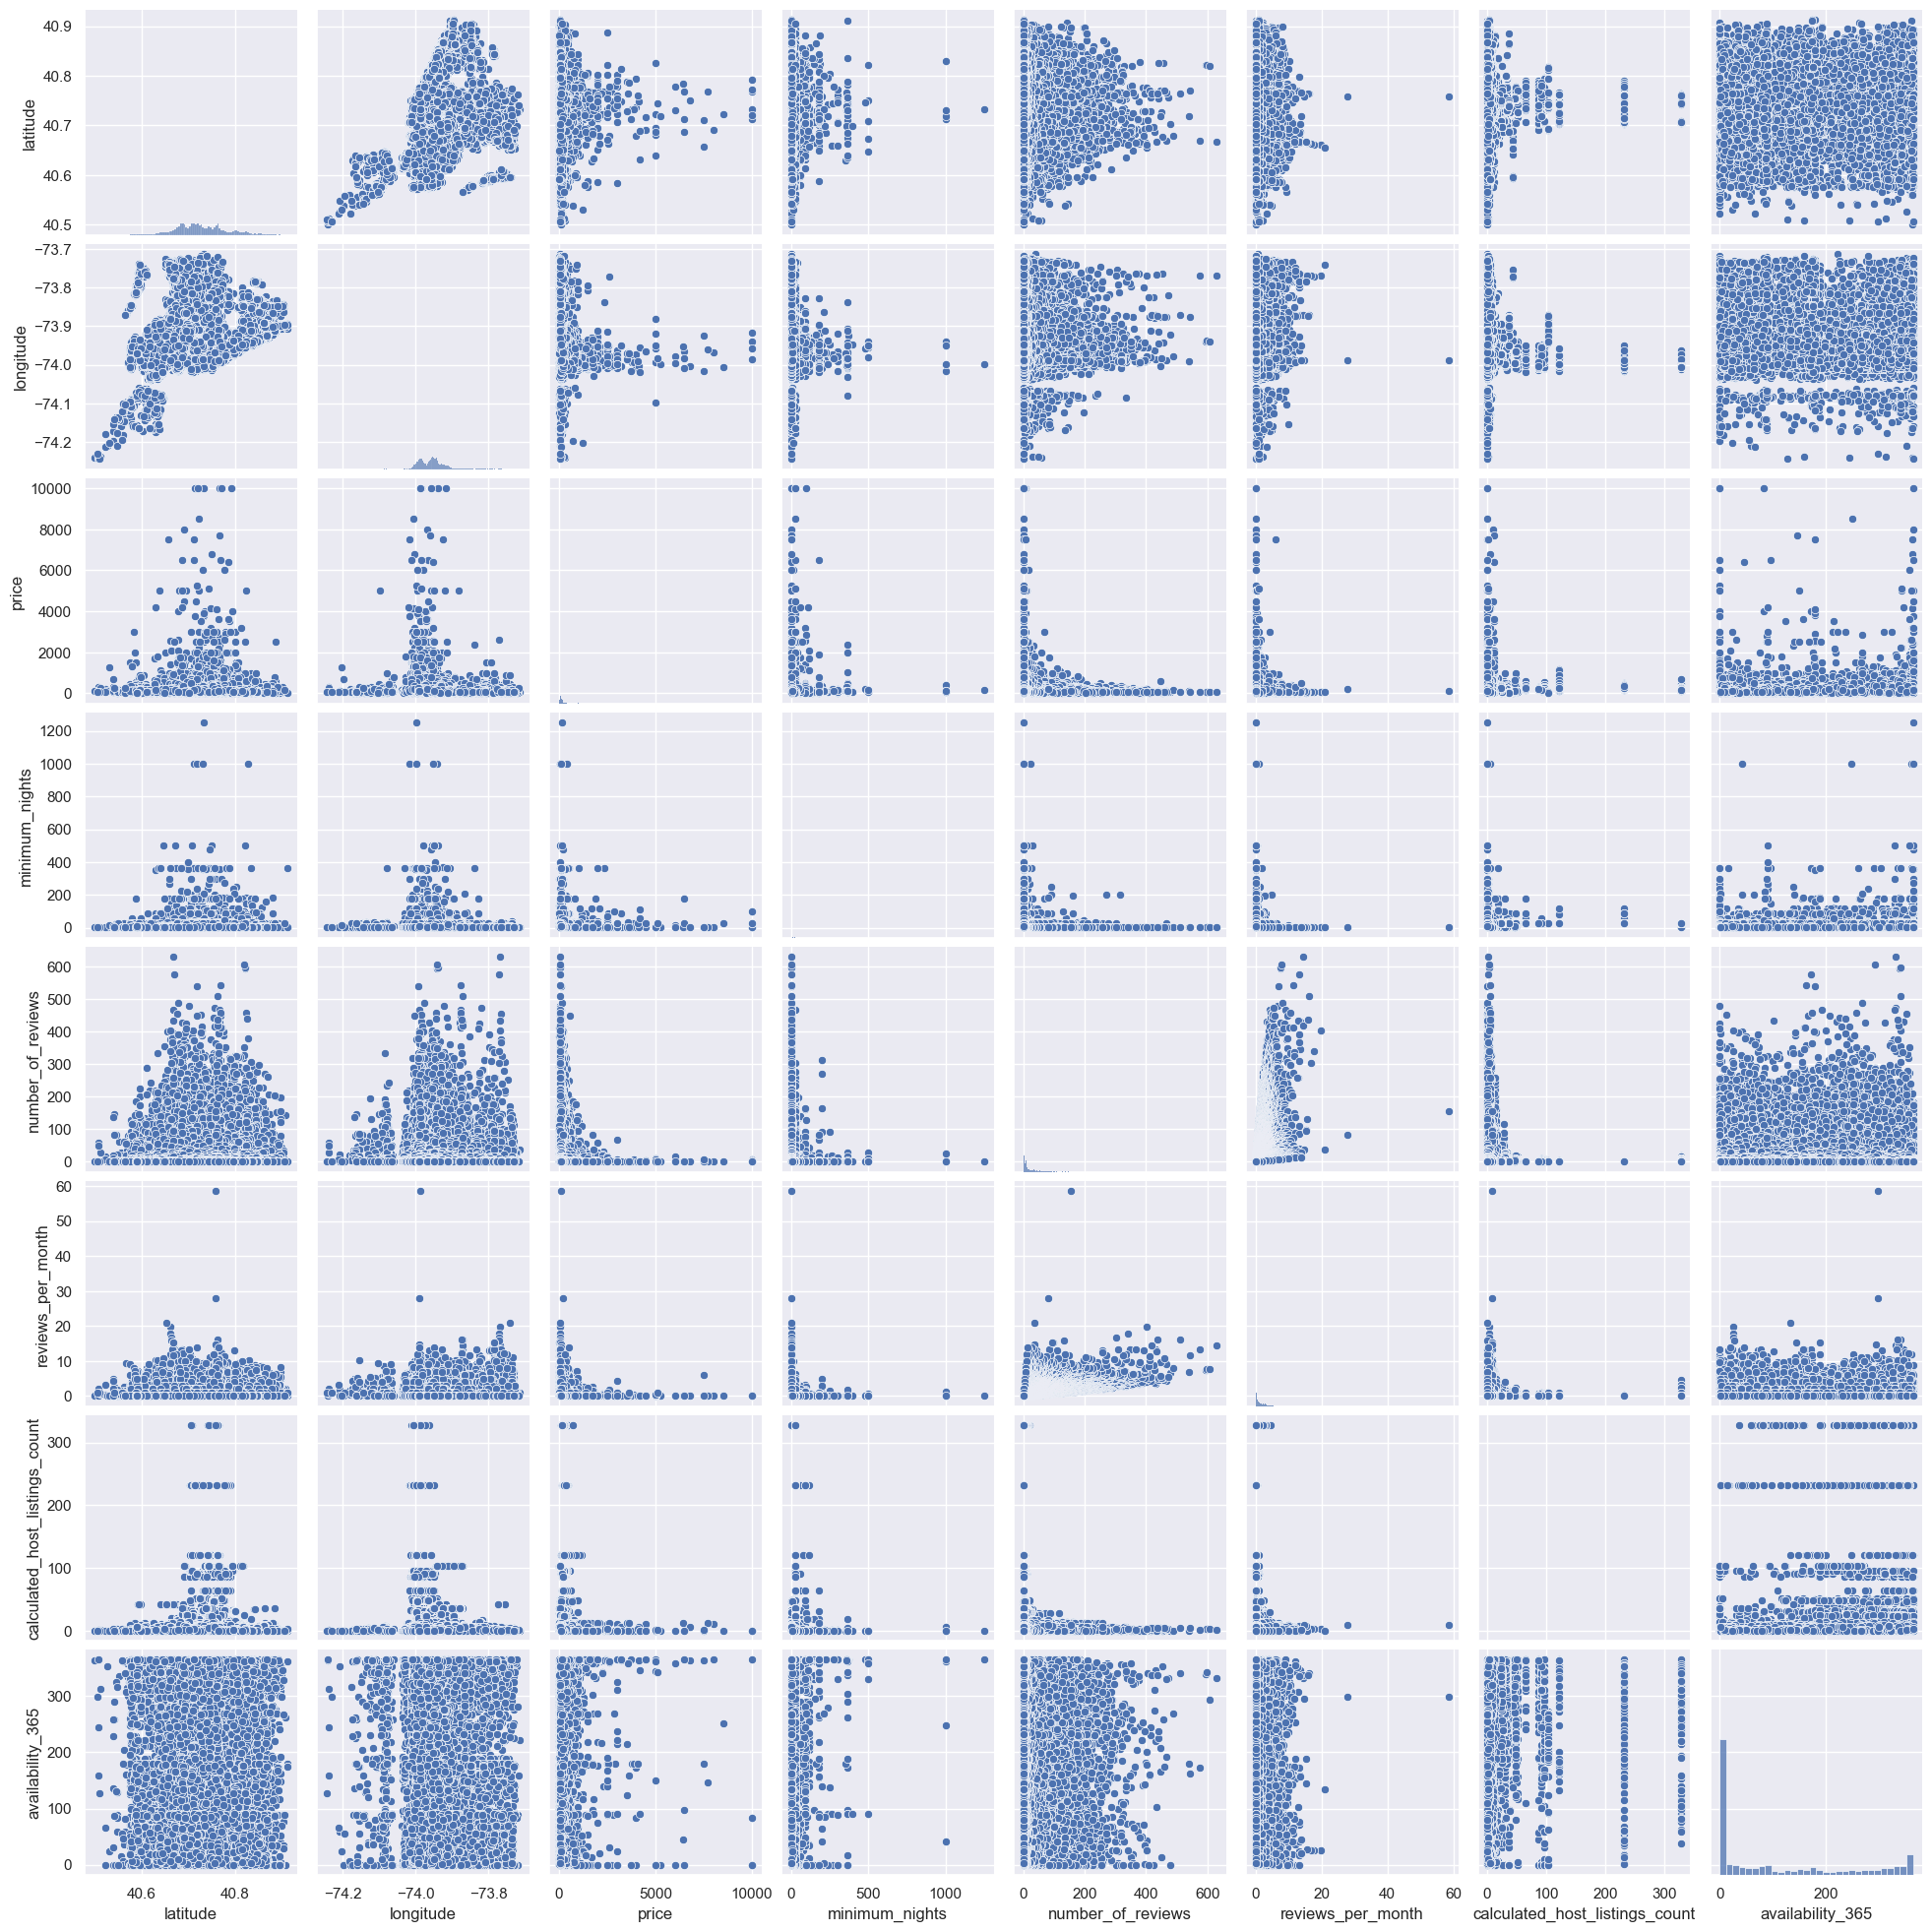

In [29]:
sns.pairplot(df)

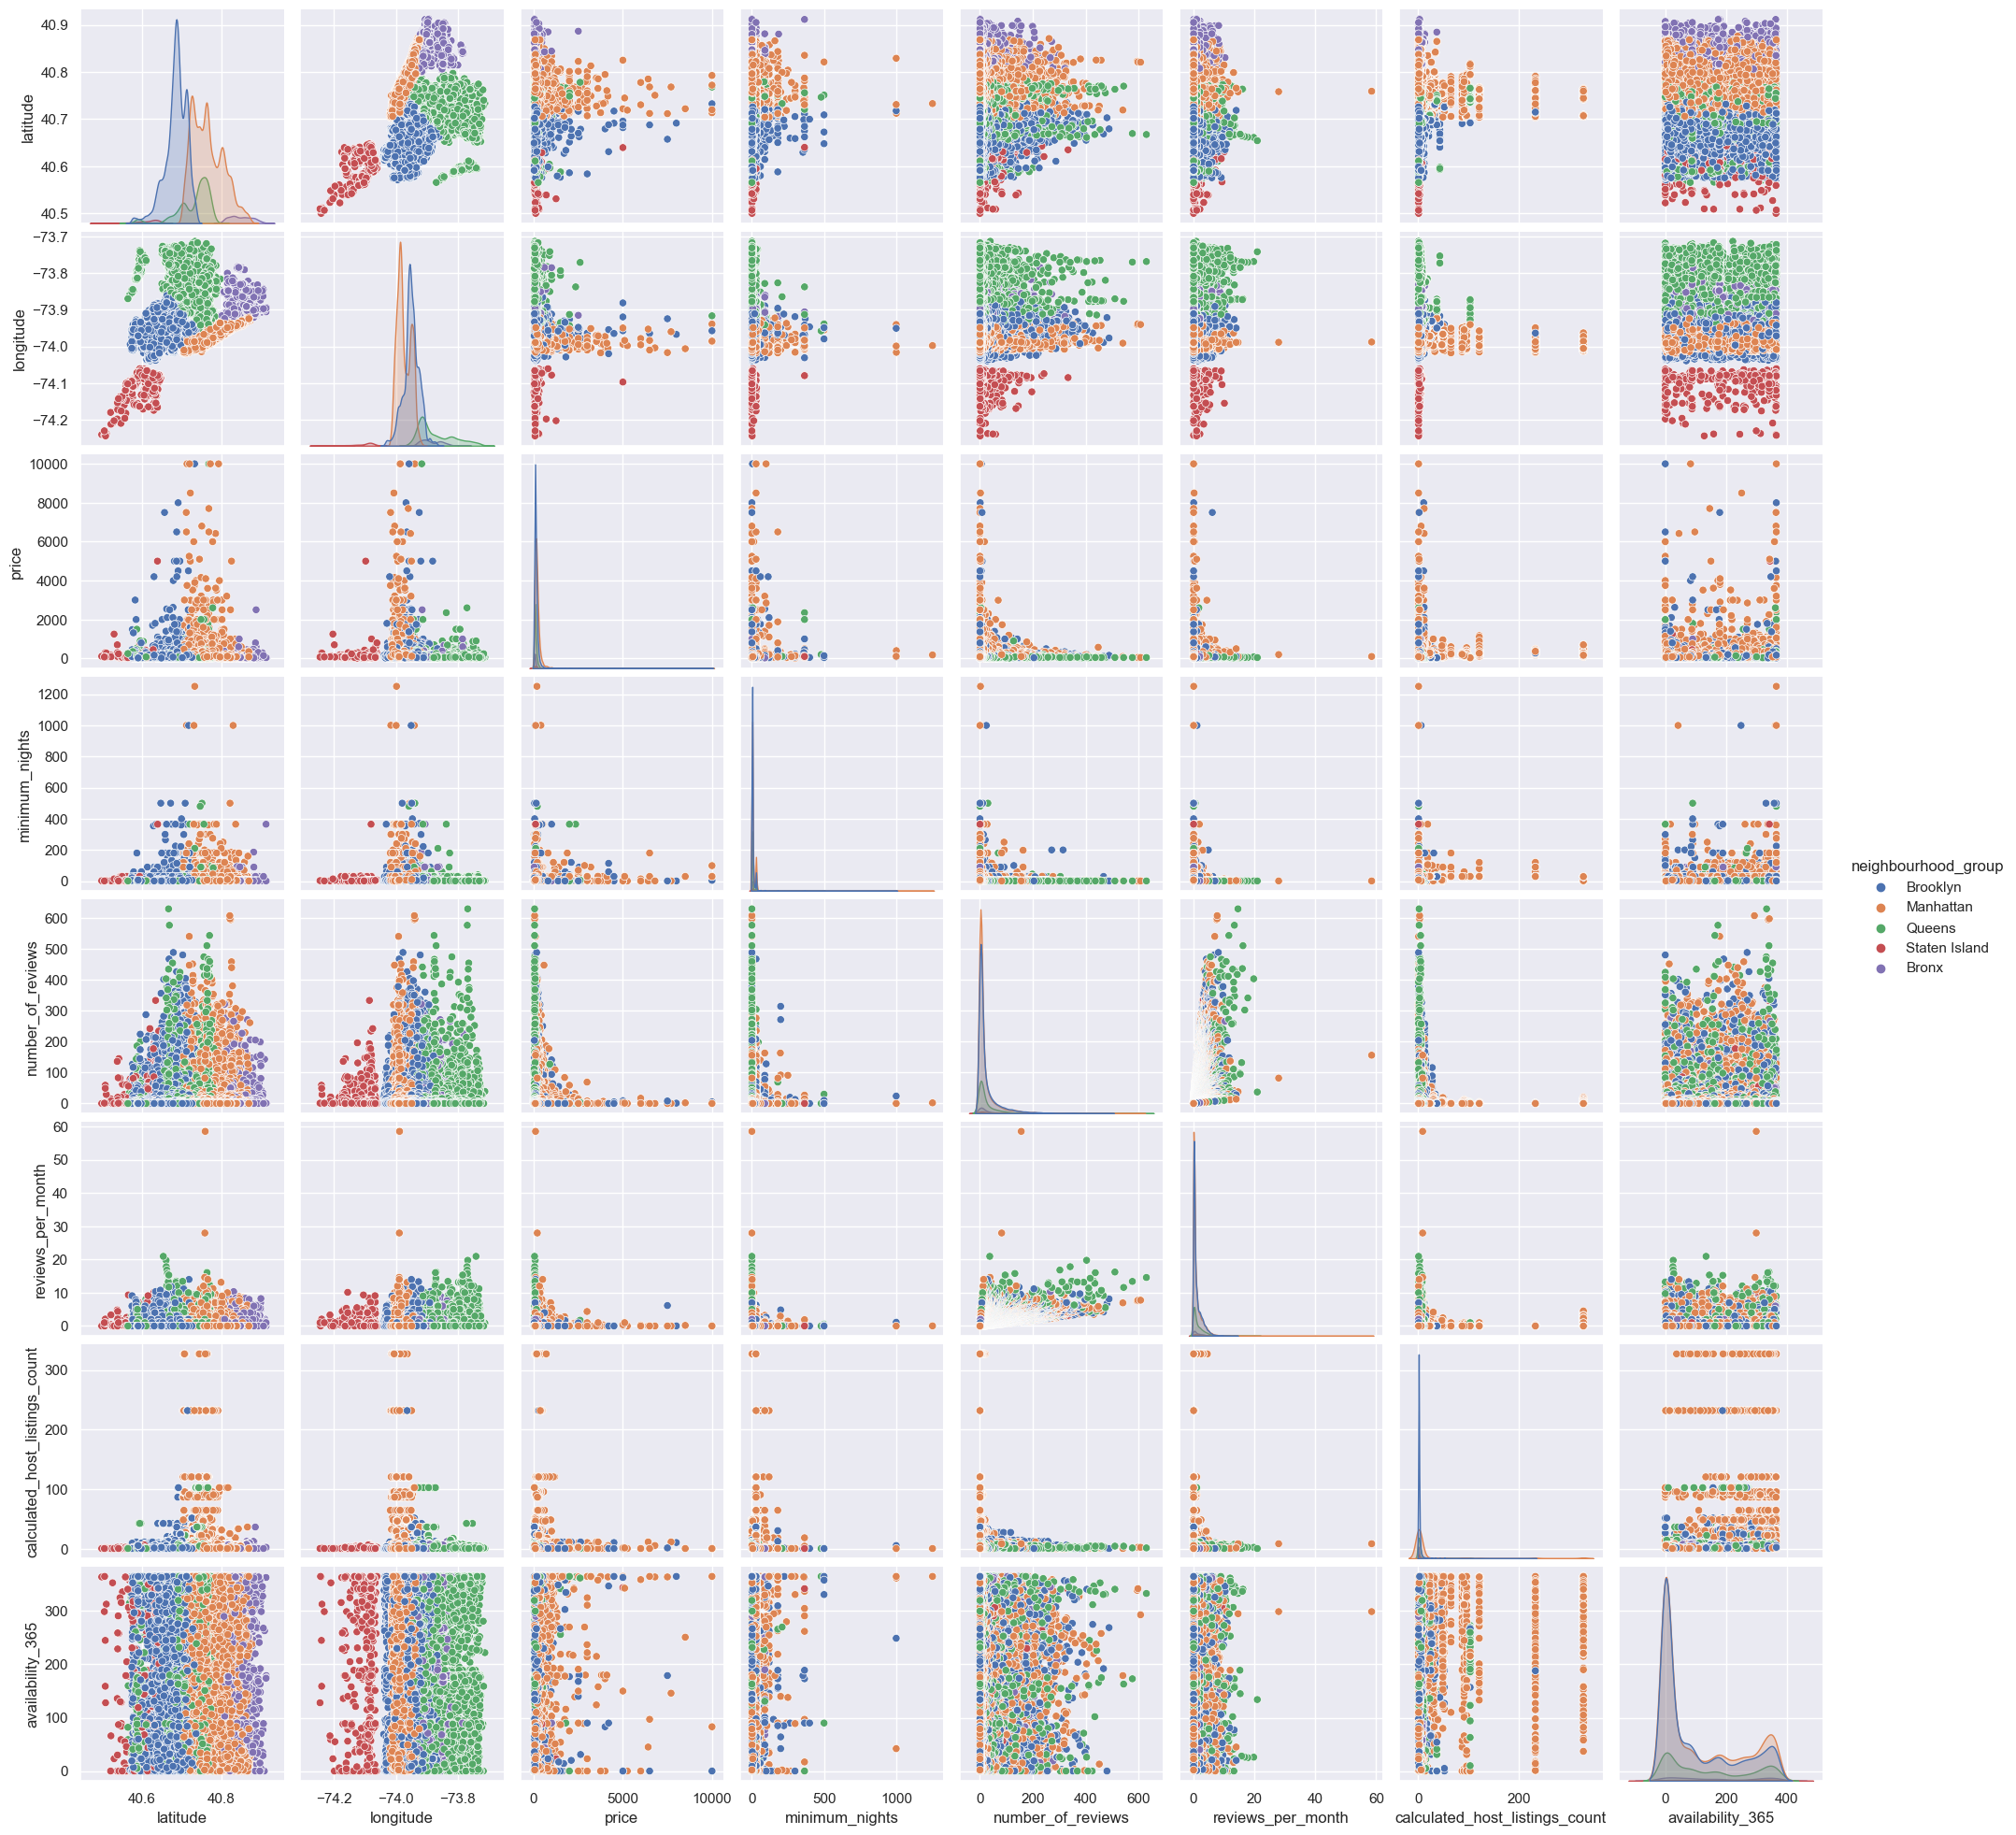

In [31]:
sns.pairplot(df,hue='neighbourhood_group')